<a href="https://colab.research.google.com/github/abnormalPotassium/DATA620/blob/main/Project%203/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3: Names Corpus Collaborative Classifier

By: DATA620 SP2024 Class


---
## Goal

This project's goal is to:
-  Using any of the three classifiers described in chapter 6 of Natural Language Processing with Python, and any features you can think of, build the best name gender classifier you can.
  -  Begin by splitting the Names Corpus into three subsets: 500 words for the test set, 500 words for the dev-test set, and the remaining 6900 words for the training set.
  -  Then, starting with the example name gender classifier, make incremental improvements. Use the dev-test set to check your progress.
  -  Once you are satisfied with your classifier, check its final performance on the test set.
  -  Describe how the performance on the test set compares to the performance on the dev-test set and if the divergence is expected.


---
## Package Installation

Any packages that need to be installed for working on the classifier can be added in the code block below. The very initial package assumption is that we'll simply need nltk and possibly pandas.

In [1]:
!pip install nltk
!pip install pandas


---
## Dataset Loading

[Our data](http://www.cs.cmu.edu/afs/cs/project/ai-repository/ai/areas/nlp/corpora/names/0.html) is a set of names collected by Mark Kantrowitz and Bill Ross in 1994 where the names are separated in files by gender. There are 7944 observations in total with 5001 female names and 2943 males that are sorted alphabetically.

The nltk package allows for directly downloading and accessing this dataset which we do below. Note that dataset loading process is largely identical to sample code provided in the [nltk book](https://www.nltk.org/book/ch06.html) by Steven Bird, Ewan Klein, and Edward Loper.

In [16]:
import nltk
nltk.download('names')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


True

After downloading the dataset that consists of two separate files for male and female, we create a combined list of lists which has each name paired with its gender. Since, these are initially sorted alphabetically we used the random package's ability to shuffle lists in place to allow us to split the data randomly. Note that a seed is set here to encourage reproducibility.

In [31]:
from nltk.corpus import names
import random

labeled_names = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])

random.seed(1337)
random.shuffle(labeled_names)

We split the `labeled_names` list into a training set with 6944 observations, a dev-test set with 500 observations, and a test set with 500 observations. The training set will be used for training the models, the dev-test set will be used for initially testing the trained models while further developing them, and the test set will be used for the final performance test.

In [32]:
train_names = labeled_names[1000:]
devtest_names = labeled_names[500:1000]
test_names = labeled_names[:500]

---
## Model Building

With our dataset split we can now focus on building a model to classify gender from names. We will focus on three different types of classifiers and optimizing these three classifiers to get the best predictive performance out of them.

### Classifier 1: Naive Bayes

**The groups that will work on the naive Bayes classifier are:**

#### Book Base

We begin the base of our naive Bayes classifier by looking at how the ntlk book tackles it. We have three different ways to extract features from our dataset:

1.   A very simple approach that uses the last letter of the name as the singular feature.
2.   A complex approach that predicts based on the first letter of the name, the last letter of the name, and two features for every single letter in the alphabet based on if a letter is present in the name and how many of the letter are present.
3.   A simple approach that uses the last two letters of the name as features.



In [40]:
def gender_features1(word):
  return {'last_letter': word[-1]}

def gender_features2(name):
    features = {}
    features["first_letter"] = name[0].lower()
    features["last_letter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = name.lower().count(letter)
        features["has({})".format(letter)] = (letter in name.lower())
    return features

def gender_features3(word):
  return {'suffix1': word[-1:],
          'suffix2': word[-2:]}

If we check the accuracy of each of these feature sets trained to a naive Bayes model we see that the more features we have the greater the accuracy. However, the book showcases that our complex featureset actually ends up overfitting the test set. Thus, our starting point for improvement should be adding and modifying features to the suffix based classifier.

In [53]:
train_set1 = [(gender_features1(n), gender) for (n, gender) in train_names]
devtest_set1 = [(gender_features1(n), gender) for (n, gender) in devtest_names]

classifier1 = nltk.NaiveBayesClassifier.train(train_set1)

train_set2 = [(gender_features2(n), gender) for (n, gender) in train_names]
devtest_set2 = [(gender_features2(n), gender) for (n, gender) in devtest_names]

classifier2 = nltk.NaiveBayesClassifier.train(train_set2)

train_set3 = [(gender_features3(n), gender) for (n, gender) in train_names]
devtest_set3 = [(gender_features3(n), gender) for (n, gender) in devtest_names]

classifier3 = nltk.NaiveBayesClassifier.train(train_set3)

print(f"""
The gender prediction accuracy for our last letter based classifier is {nltk.classify.accuracy(classifier1, devtest_set1)*100}%
The gender prediction accuracy for our large featureset classifier is {nltk.classify.accuracy(classifier2, devtest_set2)*100}%
The gender prediction accuracy for our suffix based classifier is {nltk.classify.accuracy(classifier3, devtest_set3)*100}%
""")


The gender prediction accuracy for our last letter based classifier is 77.2%
The gender prediction accuracy for our large featureset classifier is 80.0%
The gender prediction accuracy for our suffix based classifier is 78.2%



#### Building Upon The Base

Here we begin working on improving our existing naive Bayes model.

### Classifier 2: Maximum Entropy Model

**The groups that will work on the maximum entropy model classifier are:**

### Classifier 3: Decision Tree

**The groups that will work on the decision tree classifier are:**

---
## Final Models Performance Analysis

**The group that will work on final performance analysis and conclusion is:**

Here we test the final versions of each classifier against the test set to see which model is possibly the best for predicting our data.

---
## Conclusion

Here we take a look at why our best model might have come out on top. Such as features of the classifier that are best suited to name classification. We will also propose further data or classifiers that may allow us to stretch our predictive performance even further

---
## Video Presentation

**The group that will do the video presentation is:**

The code below allows a YouTube link to the video presentation to be inserted for the url variable and will then display the YouTube video within the notebook itself.

A regex match extracts the video ID from the URL which is then fed into the IPython package's built in Youtube embedder.

In [13]:
url = "https://www.youtube.com/watch?v=tqj290bL-rE"

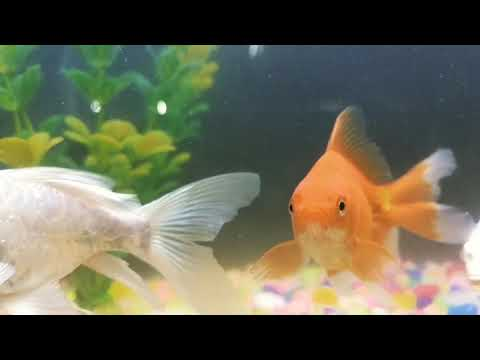

In [14]:
from IPython.display import YouTubeVideo
import re

reg = r"(?:v=|\/)([0-9A-Za-z_-]{11}).*"
urlid = re.search(reg, url)[1]

YouTubeVideo(urlid, width=800, height=450)